In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("pldata.csv")
df.sample(10)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Red Card,Recent Form
234,8,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Home,W,2,0,...,19.0,6.0,15.8,0.0,1,1,2024,NewcastleUnited,0,70
671,31,2024-03-02,17:30,Premier League,Matchweek 27,Sat,Home,L,2,3,...,14.0,4.0,11.4,1.0,0,0,2024,LutonTown,1,30
618,11,2023-11-05,14:00,Premier League,Matchweek 11,Sun,Home,W,2,0,...,5.0,3.0,21.1,0.0,0,0,2024,NottinghamForest,1,3
370,32,2024-03-30,15:00,Premier League,Matchweek 30,Sat,Away,D,1,1,...,10.0,3.0,18.4,0.0,0,0,2024,CrystalPalace,0,60
462,8,2023-10-02,20:00,Premier League,Matchweek 7,Mon,Home,L,0,2,...,10.0,3.0,13.2,0.0,0,0,2024,Fulham,1,77
474,22,2023-12-26,15:00,Premier League,Matchweek 19,Tue,Away,L,0,3,...,8.0,3.0,21.6,1.0,0,0,2024,Fulham,0,9
314,15,2023-11-04,15:00,Premier League,Matchweek 11,Sat,Away,L,2,3,...,12.0,2.0,15.3,0.0,0,0,2024,WestHamUnited,0,61
673,33,2024-03-13,19:30,Premier League,Matchweek 17,Wed,Away,L,3,4,...,8.0,4.0,8.4,0.0,0,0,2024,LutonTown,1,50
170,19,2023-12-28,19:30,Premier League,Matchweek 19,Thu,Away,L,2,4,...,19.0,3.0,15.2,1.0,0,0,2024,TottenhamHotspur,1,47
233,6,2023-09-24,16:30,Premier League,Matchweek 6,Sun,Away,W,8,0,...,22.0,15.0,14.2,0.0,0,0,2024,NewcastleUnited,1,9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    760 non-null    int64  
 1   Date          760 non-null    object 
 2   Time          760 non-null    object 
 3   Comp          760 non-null    object 
 4   Round         760 non-null    object 
 5   Day           760 non-null    object 
 6   Venue         760 non-null    object 
 7   Result        760 non-null    object 
 8   GF            760 non-null    int64  
 9   GA            760 non-null    int64  
 10  Opponent      760 non-null    object 
 11  xG            760 non-null    float64
 12  xGA           760 non-null    float64
 13  Poss          760 non-null    float64
 14  Attendance    760 non-null    float64
 15  Captain       760 non-null    object 
 16  Formation     760 non-null    object 
 17  Referee       760 non-null    object 
 18  Match Report  760 non-null    

In [34]:
columns_to_drop = ["Unnamed: 0", "Comp", "Round", "Captain", "Formation", "Referee", "Match Report", "Notes", "Dist", "Attendance", "Day", "Time", "Season"]

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [35]:
df.head()

,Date,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Sh,SoT,FK,PK,PKatt,Team,Red Card,Recent Form
0,2023-08-11,Away,W,3,0,Burnley,1.9,0.3,65.0,17.0,8.0,0.0,0,0,ManchesterCity,0,54
1,2023-08-19,Home,W,1,0,Newcastle Utd,1.0,0.3,59.0,14.0,4.0,0.0,0,0,ManchesterCity,0,98
2,2023-08-27,Away,W,2,1,Sheffield Utd,3.5,0.7,79.0,29.0,9.0,2.0,0,1,ManchesterCity,1,70
3,2023-09-02,Home,W,5,1,Fulham,2.2,1.4,68.0,6.0,4.0,0.0,1,1,ManchesterCity,0,36
4,2023-09-16,Away,W,3,1,West Ham,3.6,0.9,68.0,29.0,13.0,1.0,0,0,ManchesterCity,1,68


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         760 non-null    object 
 1   Venue        760 non-null    object 
 2   Result       760 non-null    object 
 3   GF           760 non-null    int64  
 4   GA           760 non-null    int64  
 5   Opponent     760 non-null    object 
 6   xG           760 non-null    float64
 7   xGA          760 non-null    float64
 8   Poss         760 non-null    float64
 9   Sh           760 non-null    float64
 10  SoT          760 non-null    float64
 11  FK           760 non-null    float64
 12  PK           760 non-null    int64  
 13  PKatt        760 non-null    int64  
 14  Team         760 non-null    object 
 15  Red Card     760 non-null    int64  
 16  Recent Form  760 non-null    int64  
dtypes: float64(6), int64(6), object(5)
memory usage: 101.1+ KB


In [37]:
datadict = pd.DataFrame(df.dtypes)
datadict = datadict.rename(columns={0:'DataType'})
datadict['MissingVal'] = df.isnull().sum()
datadict['NUnique']=df.nunique()
datadict['Count']=df.count()
datadict

,DataType,MissingVal,NUnique,Count
Date,object,0,120,760
Venue,object,0,2,760
Result,object,0,3,760
GF,int64,0,8,760
GA,int64,0,8,760
Opponent,object,0,20,760
xG,float64,0,45,760
xGA,float64,0,45,760
Poss,float64,0,63,760
Sh,float64,0,34,760


In [38]:
df.isnull().sum()

Date           0
Venue          0
Result         0
GF             0
GA             0
Opponent       0
xG             0
xGA            0
Poss           0
Sh             0
SoT            0
FK             0
PK             0
PKatt          0
Team           0
Red Card       0
Recent Form    0
dtype: int64

In [39]:
df.describe()

,GF,GA,xG,xGA,Poss,Sh,SoT,FK,PK,PKatt,Red Card,Recent Form
count,760.000000,760.000000,760.000000,760.000000,760.0000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,1.639474,1.639474,1.550263,1.550263,50.0000,13.660526,4.668421,0.372368,0.126316,0.140789,0.488158,47.298684
std,1.331297,1.331297,0.891314,0.891314,13.7495,6.058391,2.645612,0.598218,0.359097,0.377104,0.500189,28.642662
min,0.000000,0.000000,0.000000,0.000000,18.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.900000,0.900000,40.0000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,1.000000,1.000000,1.400000,1.400000,50.0000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,46.000000
75%,2.000000,2.000000,2.100000,2.100000,60.0000,17.000000,6.000000,1.000000,0.000000,0.000000,1.000000,71.000000
max,8.000000,8.000000,7.000000,7.000000,82.0000,36.000000,15.000000,3.000000,2.000000,2.000000,1.000000,100.000000


In [40]:
df.describe(include='O')

,Date,Venue,Result,Opponent,Team
count,760,760,760,760,760
unique,120,2,3,20,20
top,2024-05-19,Away,W,Burnley,ManchesterCity
freq,20,380,298,38,38


This is a correlation matrix, showing how different soccer stats relate to each other.  The numbers (correlation coefficients) range from -1 to 1.

Close to 1: Strong positive correlation. As one stat goes up, the other tends to go up (e.g., Shots (Sh) and Shots on Target (SoT)).
Close to -1: Strong negative correlation. As one stat goes up, the other tends to go down (e.g., Goals For (GF) and Goals Against (GA)).
Close to 0: Weak or no correlation. The stats don't seem related.

<Axes: >

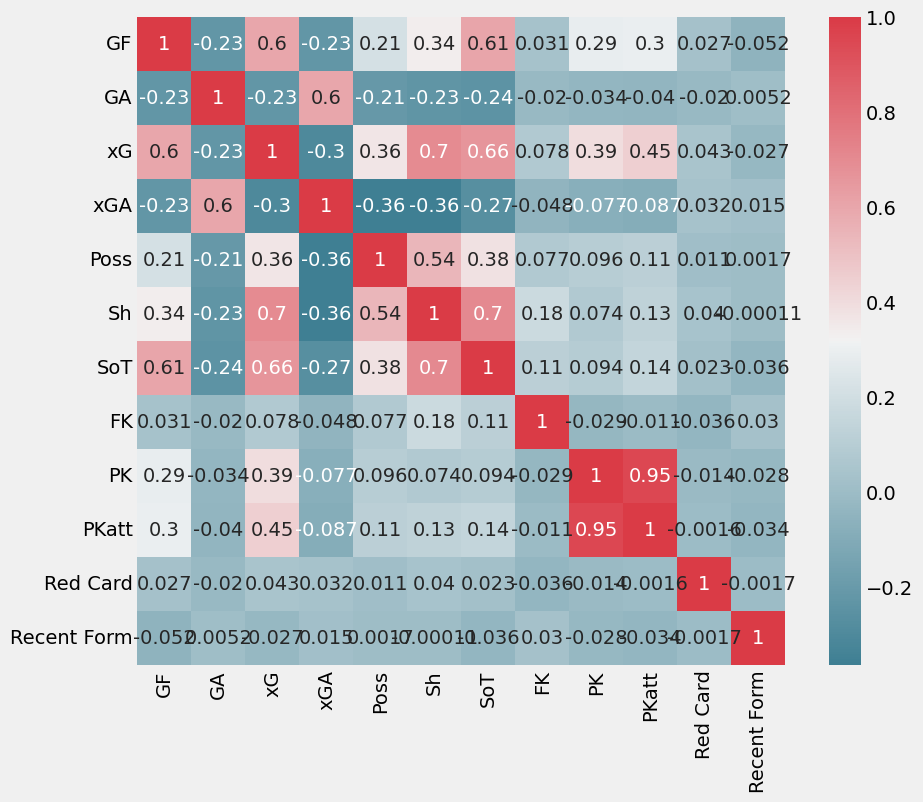

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.select_dtypes("number").corr()
sns.heatmap(
    corr,
    # mask=np.zeros_like(corr),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    annot=True,
    ax=ax,
)

We can see below image which is a box plot visualizing the distribution of possession percentage in soccer matches based on the match result (Win, Loss, or Draw).  The plot reveals that winning teams tend to have higher possession percentages, as indicated by the higher median and overall distribution of the "W" box plot compared to the "L" and "D" plots.  While there's overlap, suggesting possession isn't the sole determinant of victory, the trend is clear.  Losses show the lowest median possession, implying teams that have less of the ball tend to lose more often.  Draws exhibit a possession distribution between wins and losses.  The boxes represent the interquartile range (IQR), encompassing the middle 50% of the data, while the whiskers extend to the range of the data, excluding outliers.  This visualization effectively demonstrates a correlation between higher possession and winning in soccer.

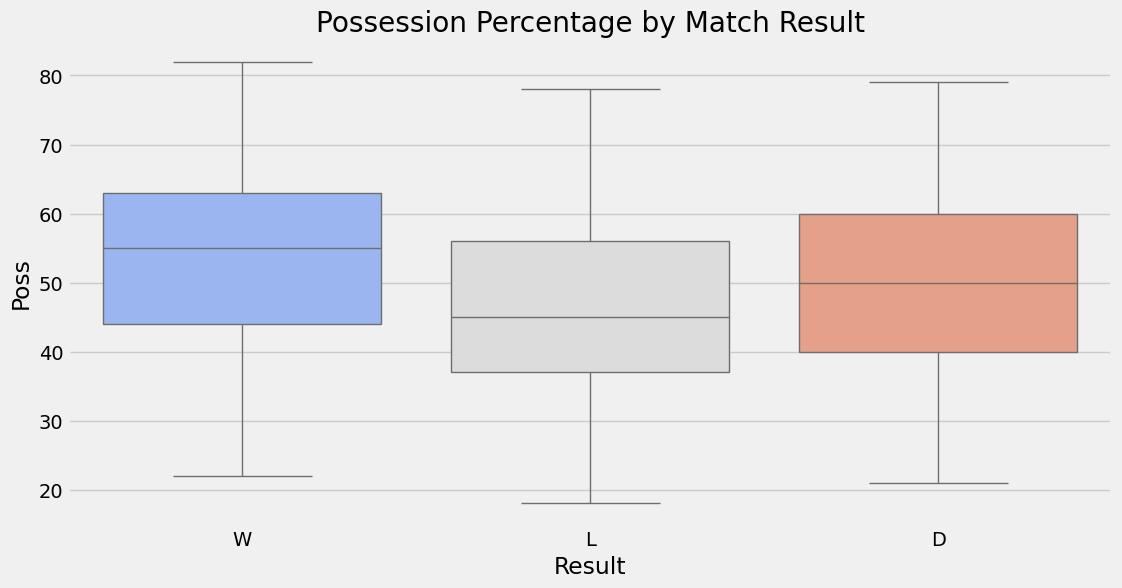

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Result", y="Poss", data=df, palette="coolwarm")
plt.title("Possession Percentage by Match Result")
plt.show()

The plot reveals that while there's a general trend of higher xG corresponding to higher GF, there's also considerable variation.  A cluster of matches shows low xG and low GF, suggesting low-scoring affairs.  The match with the highest xG didn't translate to the highest GF, highlighting the unpredictable nature of soccer.  Overall, the plot provides a visual representation of the relationship between predicted and actual goals, revealing potential areas of over or underperformance. However, we can see instances where GF significantly exceeds xG, suggesting clinical finishing or luck, and vice versa, where xG is higher but GF is lower, implying poor finishing or bad luck. 

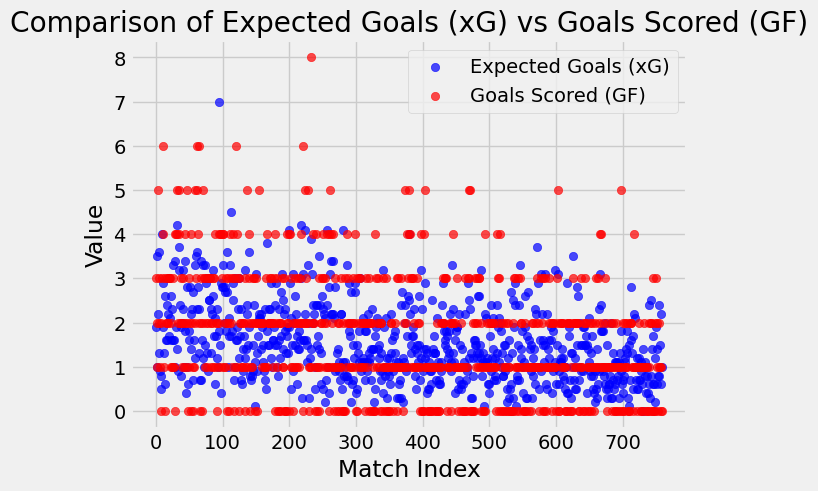

In [43]:
# Plot xG with blue markers
plt.scatter(df.index, df["xG"], color="blue", label="Expected Goals (xG)", alpha=0.7)

# Plot GF with red markers
plt.scatter(df.index, df["GF"], color="red", label="Goals Scored (GF)", alpha=0.7)

plt.title("Comparison of Expected Goals (xG) vs Goals Scored (GF)")
plt.xlabel("Match Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Generally, there's a positive correlation: as SoT increases, GF tends to increase as well, showing that teams with more shots on target typically score more goals.  However, the relationship isn't perfectly linear, as some matches with fewer SoT have still resulted in a higher number of goals, likely due to factors such as shot accuracy and opponent's defensive frailties.  The largest point, representing 7 goals, aligns with a high number of shots on target, reinforcing the overall trend.  Conversely, many matches with low SoT also have zero goals.  

jyhtgrf

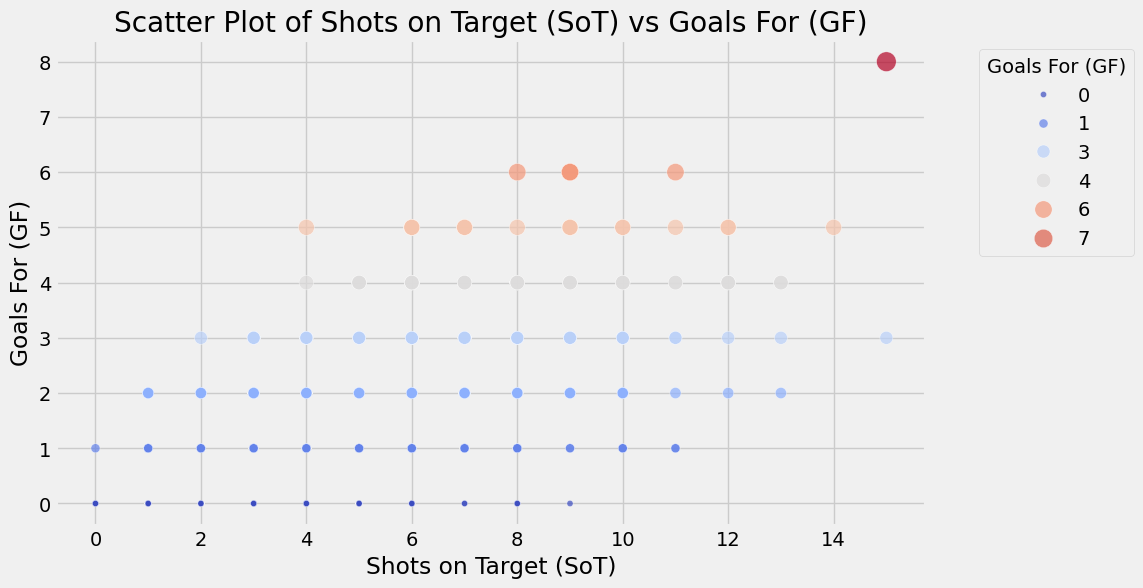

In [44]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x="SoT", y="GF", data=df, hue="GF", palette="coolwarm", alpha=0.7, size="GF", sizes=(20, 200))

plt.title("Scatter Plot of Shots on Target (SoT) vs Goals For (GF)")
plt.xlabel("Shots on Target (SoT)")
plt.ylabel("Goals For (GF)")
plt.legend(title="Goals For (GF)", bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside the plot
plt.grid(True)
plt.show()

We can see the relationship between Shots on Target (SoT) and Goals For (GF) in soccer matches, with a clear positive trend: more shots on target generally lead to more goals. The red line represents this trend, showing how GF increases with SoT.  However, the spread of points indicates that the relationship isn't perfect; some matches have more goals despite fewer shots on target, highlighting the influence of other factors like shot accuracy and luck. The shaded area around the line represents the confidence interval, showing the likely range of the true relationship.  Essentially, while putting more shots on target increases your chances of scoring, it doesn't guarantee a specific number of goals.

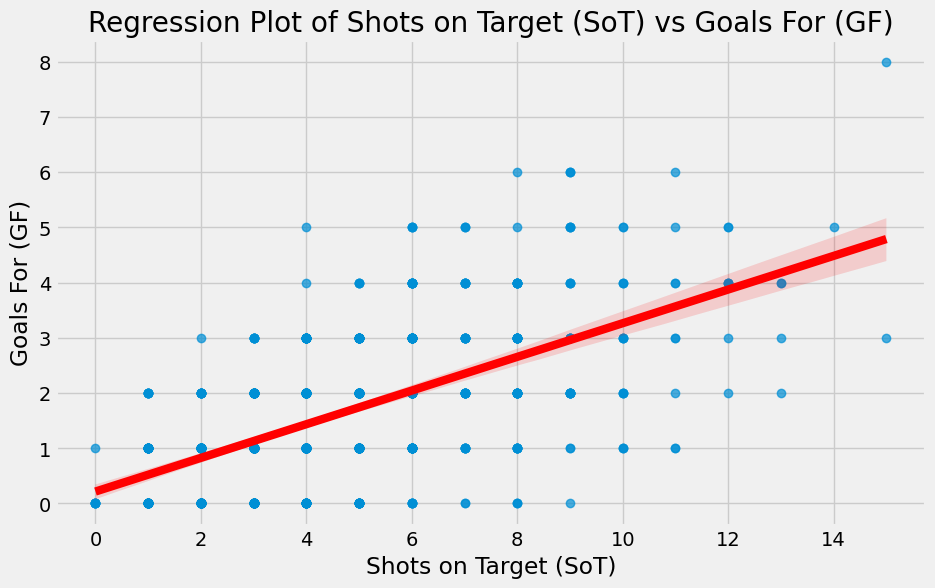

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x="SoT", y="GF", data=df, scatter_kws={"alpha":0.7}, line_kws={"color":"red"})
plt.title("Regression Plot of Shots on Target (SoT) vs Goals For (GF)")
plt.xlabel("Shots on Target (SoT)")
plt.ylabel("Goals For (GF)")
plt.show()

These histograms show the distribution of Goals For (GF), Goals Against (GA), and Possession Percentage (Poss) in a set of soccer matches.  GF and GA are heavily skewed towards lower values, indicating most matches have few goals, with occurrences of higher goal counts being less frequent.  Possession, however, appears more normally distributed, clustering around a central tendency, suggesting that while teams might have slight variations in possession, it's less skewed than goal counts. The overlaid curves on each histogram provide a visual estimate of the underlying probability distribution for each variable. These distributions offer insights into scoring patterns and possession tendencies across the analyzed matches.

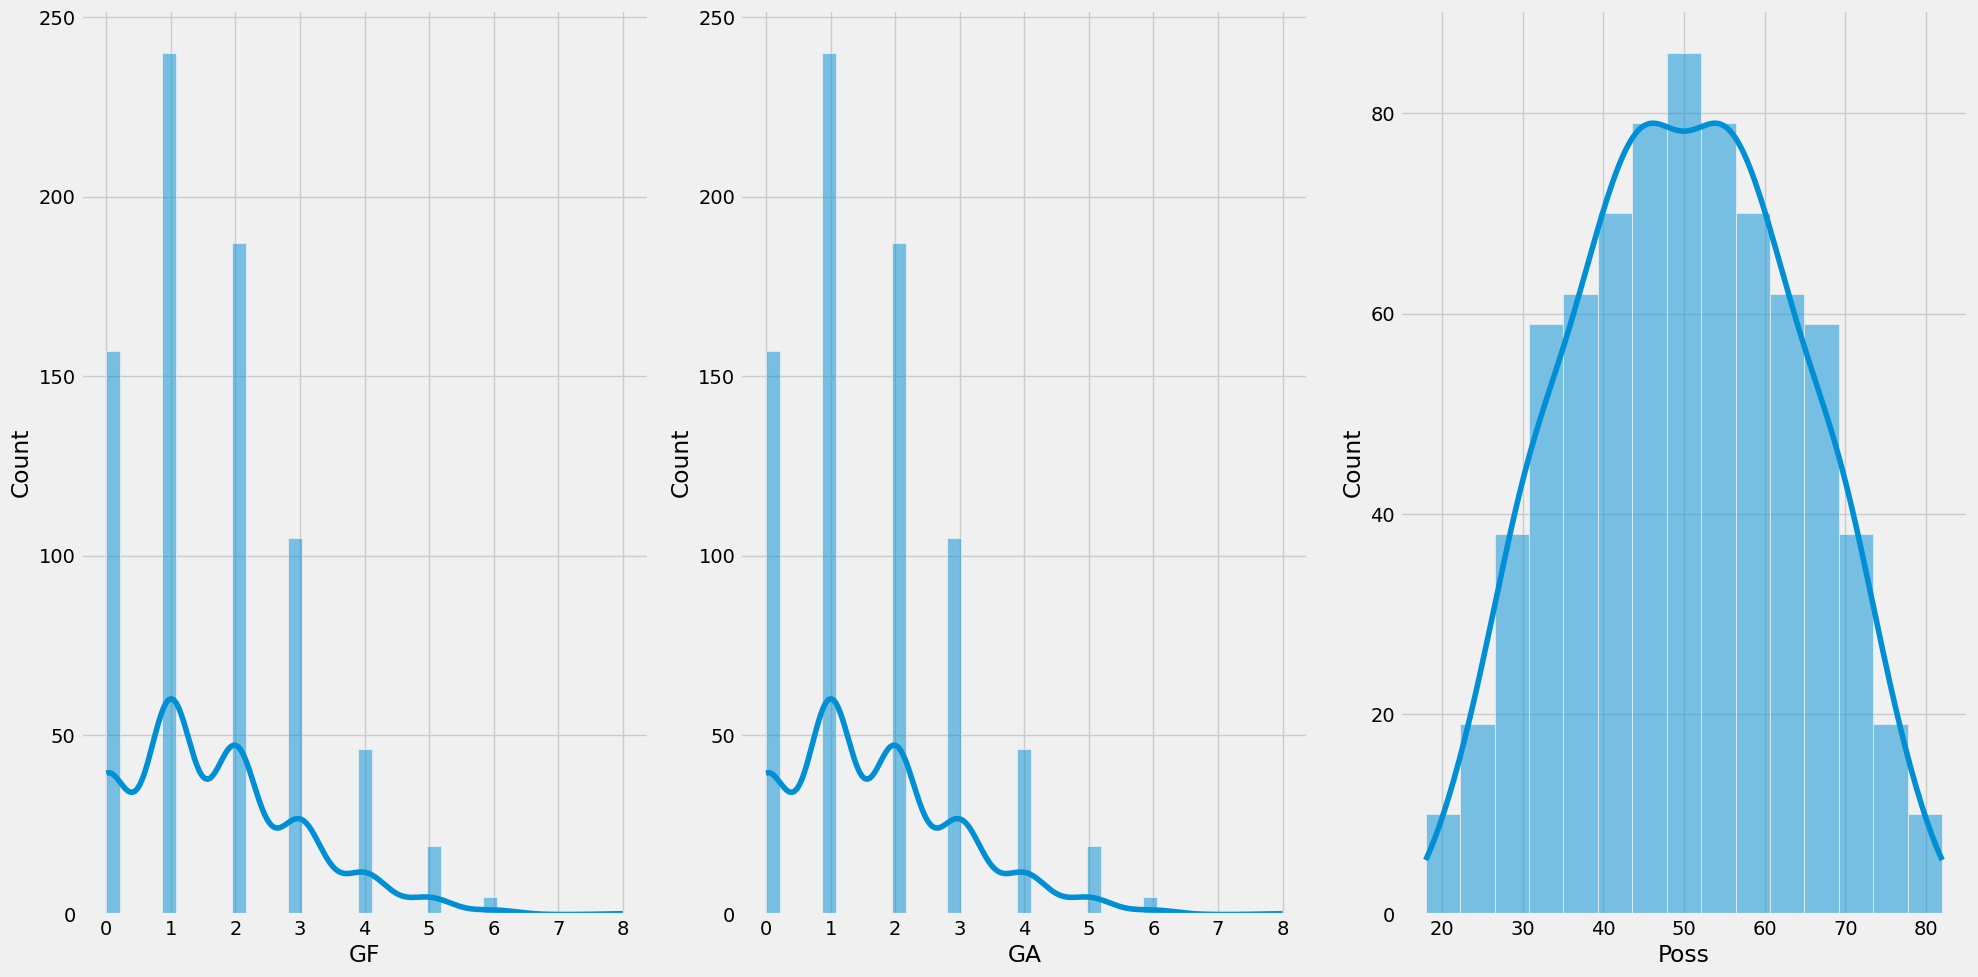

In [46]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Additional plots for numerical data
sns.histplot(x=df['GF'], kde=True, ax=axes[0])
sns.histplot(x=df['GA'], kde=True, ax=axes[1])
sns.histplot(x=df['Poss'], kde=True, ax=axes[2])

# Adjust layout
plt.tight_layout()
plt.show()

We can see that the kernel density estimate (KDE) plots visualize the distribution of Expected Goals (xG), Possession Percentage (Poss), and Shots on Target (SoT) in soccer matches.  xG and SoT distributions are right-skewed, indicating that while most matches have relatively low xG and SoT, there are less frequent occurrences of very high values.  Possession percentage appears more normally distributed, suggesting a more balanced distribution around the average possession.  The different shapes and spread of these distributions offer insights into the nature of these performance indicators in soccer.  In essence, these plots illustrate the varying frequencies of different performance levels across matches.

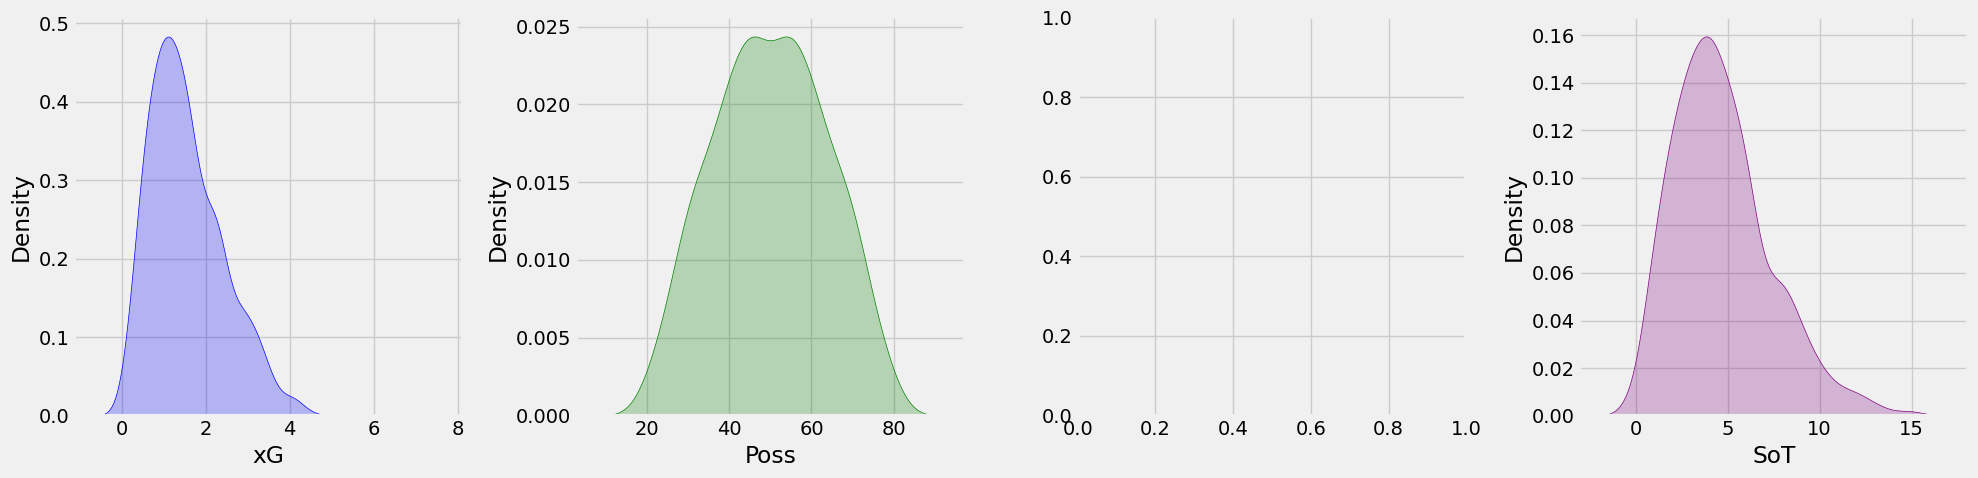

In [47]:
# Create subplots (1 row, 4 columns)
figbi, axesbi = plt.subplots(1, 4, figsize=(20, 5))

# KDE Plots for continuous variables
sns.kdeplot(df['xG'], ax=axesbi[0], fill=True, color='blue', shade=True)
sns.kdeplot(df['Poss'], ax=axesbi[1], fill=True, color='green', shade=True)
sns.kdeplot(df['SoT'], ax=axesbi[3], fill=True, color='purple', shade=True)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

We can see that the distribution of Shots on Target (SoT) in soccer matches, categorized by match result (win, loss, or draw), though the legend is cut off.  The overlapping histograms and kernel density curves show how frequently different SoT counts occur for each result.  It appears that wins (blue) are associated with a higher number of SoT, while losses (red) tend to have lower SoT.  Draws (yellow) seem to fall in between.  This visualization suggests a correlation between more shots on target and a higher likelihood of winning.

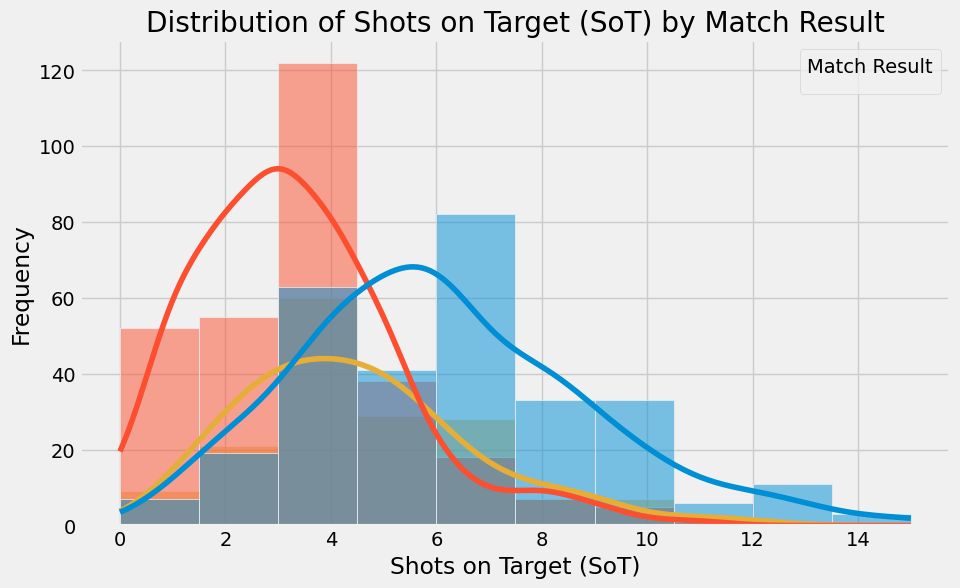

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SoT', hue='Result', kde=True, bins=10)
plt.title('Distribution of Shots on Target (SoT) by Match Result')
plt.xlabel('Shots on Target (SoT)')
plt.ylabel('Frequency')
plt.legend(title='Match Result')
plt.show()

We can see that the box plot compares the distribution of Shots on Target (SoT) across different match results (Win, Loss, Draw).  Winning matches (W) exhibit a higher median and wider spread of SoT, suggesting teams that record more shots on target are more likely to win.  Conversely, losses (L) show a lower median and tighter distribution, indicating fewer shots on target.  Draws (D) fall between wins and losses in terms of SoT distribution.  The plot effectively visualizes the correlation between offensive output (SoT) and match outcome in football (soccer).

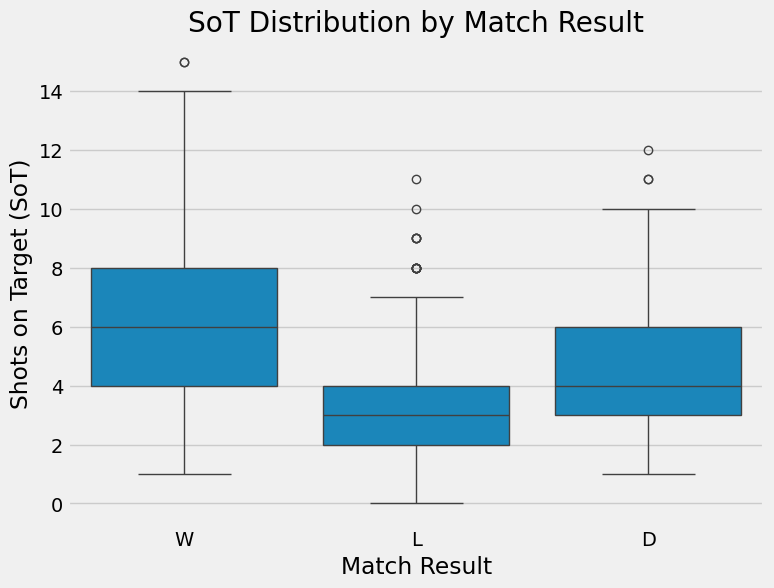

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Result', y='SoT', data=df)
plt.title('SoT Distribution by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Shots on Target (SoT)')
plt.show()

We can see that the distribution of Goals Against (GA) for different match results (Win, Loss, Draw).  Losses (L) show a higher median and wider spread of GA, indicating teams concede more goals in losses. Wins (W) have a lower median and tighter distribution of GA, demonstrating that winning teams tend to concede fewer goals. Draws (D) fall between wins and losses in terms of GA.  The plot effectively illustrates the relationship between conceding goals and match outcomes, highlighting the importance of defensive solidity in winning.

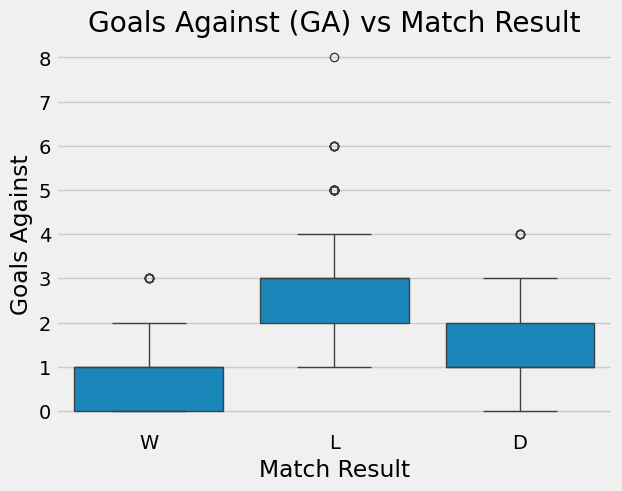

In [50]:
sns.boxplot(data=df, x='Result', y='GA')
plt.title('Goals Against (GA) vs Match Result')
plt.xlabel('Match Result')
plt.ylabel('Goals Against')
plt.show()

We can see that the grouped bar chart displays football match results (Wins, Losses, Draws) broken down by venue (Away, Home).  It shows that teams win more often at home and lose more often away, which is a typical trend in football.  The differences are quite pronounced, suggesting a significant home advantage.  Draws occur at a similar frequency regardless of venue.  This visualization effectively highlights the impact of venue on match outcomes.

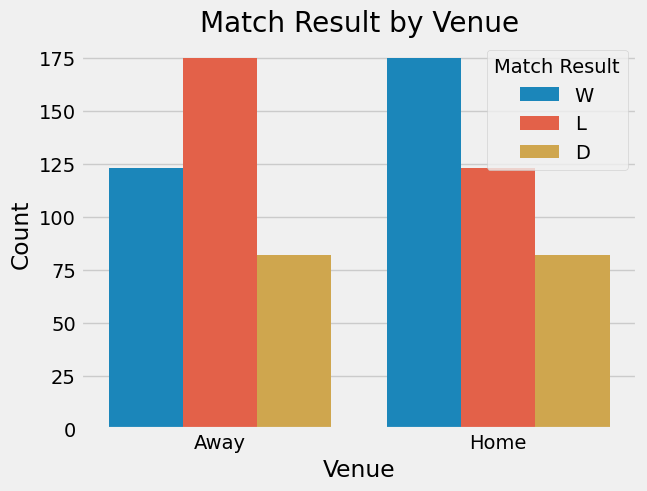

In [51]:
sns.countplot(data=df, x='Venue', hue='Result')
plt.title('Match Result by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.legend(title='Match Result')
plt.show()

We can see that the bar chart displays the average possession percentage in soccer matches categorized by the result (Draw, Loss, Win).  It shows that winning teams tend to have the highest average possession, followed by draws, and then losses, which have the lowest average possession.  This suggests a correlation between higher possession and a higher likelihood of winning.  While the differences might not be drastic, they indicate that maintaining possession could be a contributing factor to a team's success.  The chart effectively visualizes the relationship between possession and match outcome.

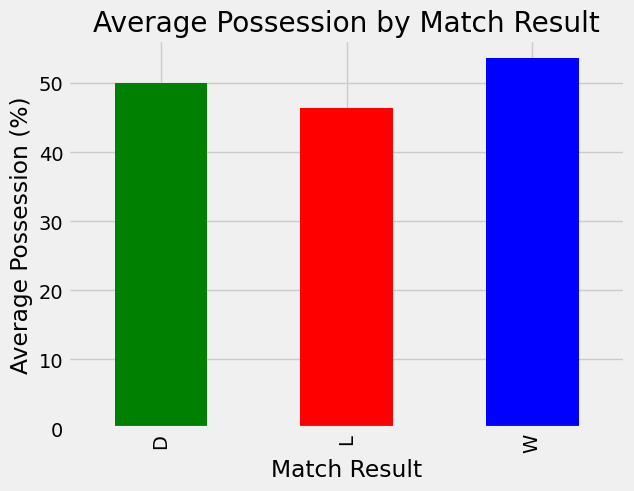

In [52]:
df.groupby('Result')['Poss'].mean().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Average Possession by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Average Possession (%)')
plt.show()

<!-- dfghuijo;
hcfgjkl -->


This stacked bar chart shows the impact of red cards on match outcomes (Draw, Loss, Win).  It reveals that matches with one red card (red portion of bars) are more likely to result in a loss.  Conversely, matches without a red card (blue portion) are more likely to be wins or draws.  This suggests that receiving a red card significantly hinders a team's chances of winning and increases the likelihood of losing.  The data implies a strong correlation between red cards and negative match results.

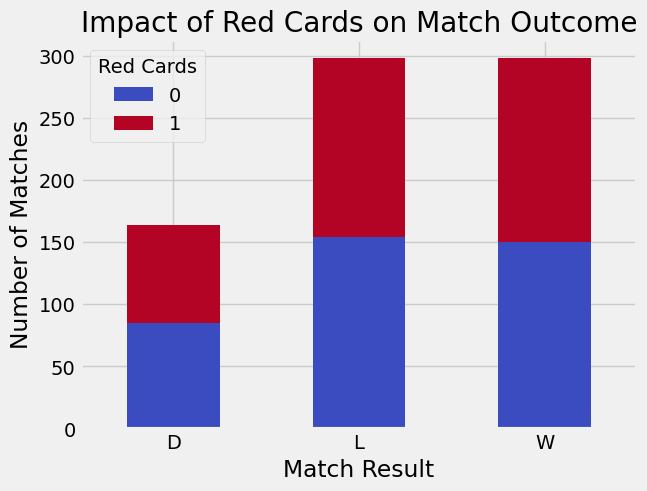

In [53]:
# Count of Red Cards per Result
red_card_counts = df.groupby(['Result', 'Red Card']).size().unstack().fillna(0)

# Plot Stacked Bar Chart
red_card_counts.plot(kind='bar', stacked=True, colormap='coolwarm')

# Labels & Titles
plt.title('Impact of Red Cards on Match Outcome')
plt.xlabel('Match Result')
plt.ylabel('Number of Matches')
plt.legend(title='Red Cards')
plt.xticks(rotation=0)
plt.show()

In [54]:
# Sample Data with Given Recent Form Scores
data = {
    'Team': ['Chelsea', 'Man City', 'Arsenal', 'Liverpool', 'Chelsea', 'Man City', 'Arsenal', 'Liverpool'],
    'Date': pd.date_range(start='2024-01-01', periods=8, freq='7D'),
    'Recent Form': [75, 90, 85, 80, 65, 95, 70, 88] 
}

df = pd.DataFrame(data)

#Summary Statistics
team_stats = df.groupby('Team')['Recent Form'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
print(team_stats)

        Team  mean  median  min  max        std
0    Arsenal  77.5    77.5   70   85  10.606602
1    Chelsea  70.0    70.0   65   75   7.071068
2  Liverpool  84.0    84.0   80   88   5.656854
3   Man City  92.5    92.5   90   95   3.535534


This box plot compares recent form scores for four football teams: Chelsea, Man City, Arsenal, and Liverpool. Man City demonstrates the highest median recent form score, indicating consistently strong performance.  Liverpool also shows a relatively high median score, though with greater variability as seen by the larger box size.  Arsenal's median score is notably lower, suggesting less consistent recent form.  Chelsea exhibits the lowest median score and a narrow range, implying consistently weaker recent performance compared to the other teams.  The plot effectively visualizes and compares the recent performance trends across these four teams.

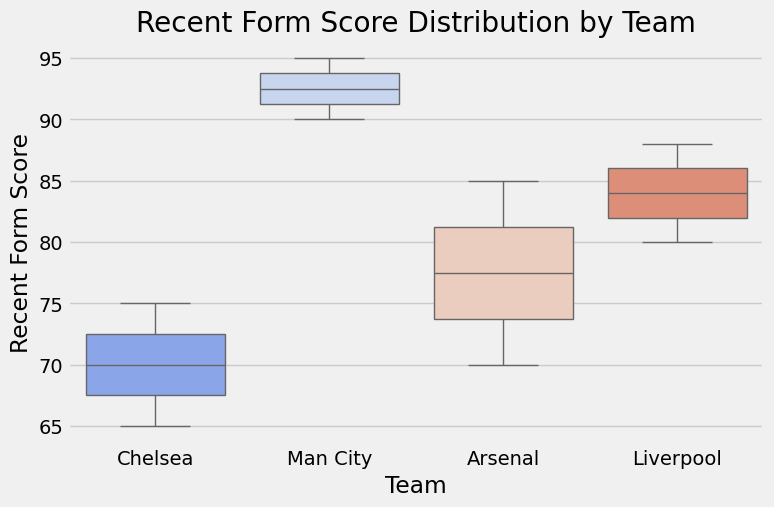

In [55]:
#Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Team', y='Recent Form', palette='coolwarm')
plt.title('Recent Form Score Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Recent Form Score')
plt.show()

This line graph tracks the "Recent Form Score" of four football teams (Chelsea, Man City, Arsenal, Liverpool) over a period of several weeks in early 2024.  Man City shows a consistent upward trend, indicating improving form.  Liverpool also demonstrates positive, though less steep, progress.  Arsenal's form declines noticeably over the period.  Chelsea's form starts relatively low and decreases further, suggesting a period of poor performance.  The graph effectively visualizes the fluctuating recent performance of these teams.

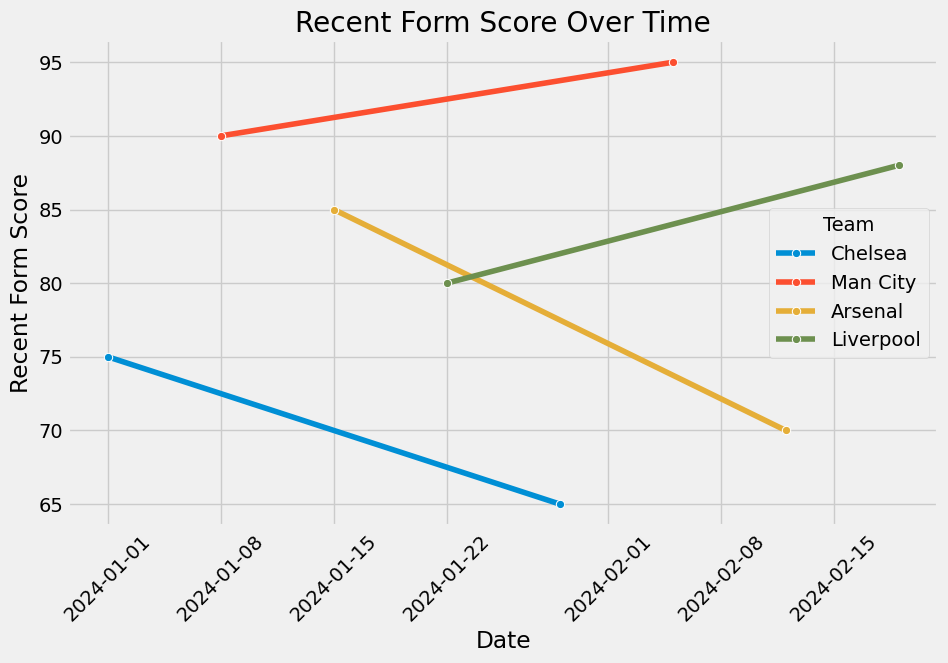

In [56]:
#Line Chart - Team Performance Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Recent Form', hue='Team', marker='o')
plt.title('Recent Form Score Over Time')
plt.xlabel('Date')
plt.ylabel('Recent Form Score')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

This heatmap visualizes "Recent Form Scores" for four football teams (Arsenal, Chelsea, Liverpool, Man City) across several weeks.  The color gradient, likely from blue (low score) to red (high score), indicates the strength of recent form. Man City consistently displays the highest scores (red), suggesting the strongest recent performance. Chelsea shows predominantly low scores (blue), indicating weaker form. Arsenal and Liverpool exhibit fluctuating form, with periods of both higher and lower scores.  The heatmap provides a clear visual comparison of relative team performance over time.

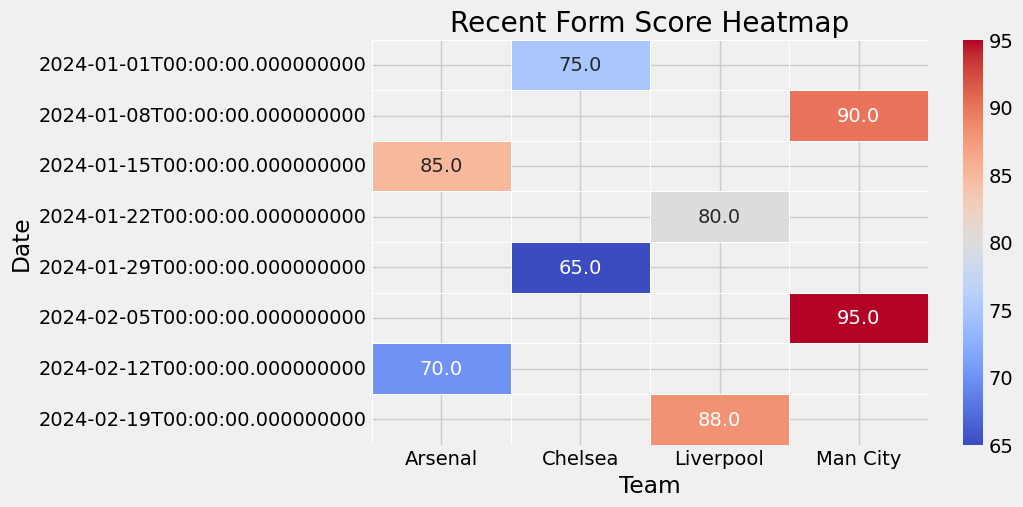

In [57]:
#Heatmap - Comparing Teams
pivot = df.pivot(index='Date', columns='Team', values='Recent Form')
plt.figure(figsize=(8,5))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Recent Form Score Heatmap')
plt.xlabel('Team')
plt.ylabel('Date')
plt.show()